<a href="https://colab.research.google.com/github/huutmmt/huutmmt/blob/main/Colaboratory_ch%C3%A0o_m%E1%BB%ABng_b%E1%BA%A1n!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision

print("Pytorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)

!pip install 'git+https://github.com/facebookresearch/segment-anything.git'

# Download the default model from here:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

import numpy as np
import matplotlib.pyplot as plt
import cv2

from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

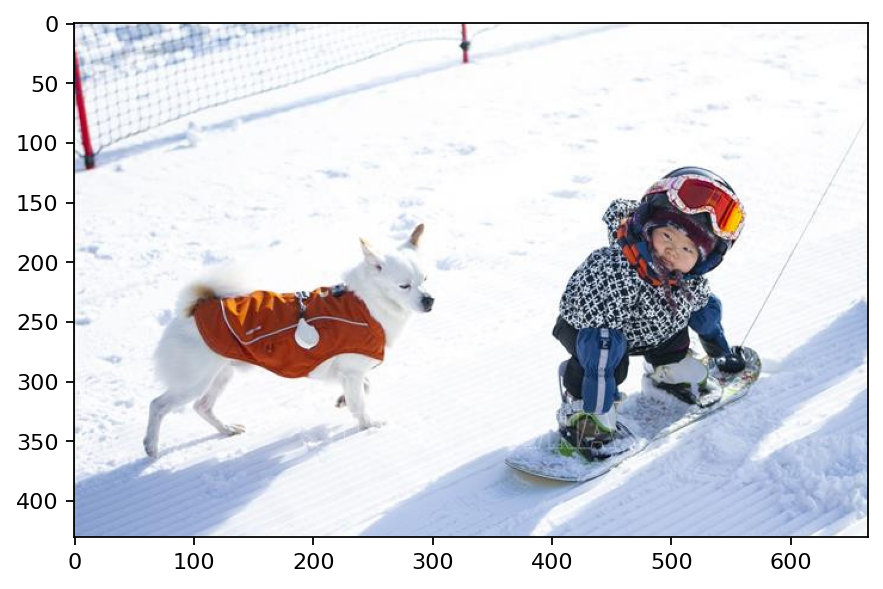

In [7]:
image = cv2.imread('images/1.jpg')

# Change the format of image that is from BGR(cv2 format) to RGB (matplotlib format)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# show the image
plt.figure(dpi=160)
plt.imshow(image)

In [8]:
sam_checkpoint = "sam_vit_h_4b8939.pth"

In [9]:
model_type = "vit_h"

In [10]:
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)

In [11]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
sam.to(device=device)

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

In [12]:
mask_generator = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=32,
    pred_iou_thresh=0.86,
    stability_score_thresh=0.9,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=100    # Requires open-cv to run post-processing
)

In [13]:
masks = mask_generator.generate(image)

print(len(masks))
print(masks[0].keys())

100
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


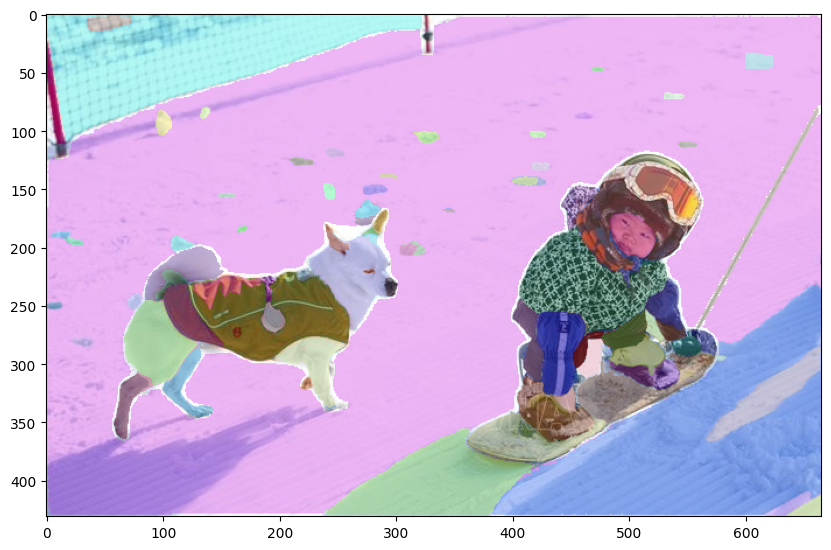

In [14]:
def show_anns(anns):
    """Takes a list of masks as an input and visualizes them on an Image"""
    if len(anns) == 0:
        return

    # Sort the masks by their area in descending order
    sorted_anns=sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax=plt.gca()
    ax.set_autoscale_on(False)

    # let's create a new image that is the same size as the largest mask
    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    """
    1st argument: sorted_anns[0]['segmentation'].shape[0] --> Height of the new image,
        2nd argument: sorted_anns[0]['segmentation'].shape[1] --> Width of the new image,
        3rd argument: specifies number of channels in new array, means each pixel in new image array will have 4 values.
    """

    img[:,:,3] = 0    # sets the alpha channel of the new image to 0.
    """A value of 0 means that the pixel is completely transparent, and a value of 1 means that the pixel is completely opaque."""

    # Now let's iterate over a sorted masks and fills in the corresponding pixels in new image with random color.
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])    # stores a random color, that will be used to fill in the pixels in the new image.
        img[m] = color_mask

    ax.imshow(img)

plt.figure(figsize=(10, 10))
plt.imshow(image)
show_anns(masks)

In [15]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.3/721.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [16]:
from ultralytics import YOLO
import math

model = YOLO('yolov9e.pt')

100%|██████████| 112M/112M [00:00<00:00, 300MB/s] 


In [17]:
classnames = ["nguoi", "xe dap", "xe hoi", "xe may", "may bay", "xe buyt", "tau hoa", "xe tai", "thuyen", "den giao thong",
              "voi phun chua chay", "bien cam", "dong ho do xe", "ghe dua", "chim", "meo", "cho", "ngua", "cuu", "bo",
              "voi", "gau", "zebra", "de giraffe", "ba lo", "o", "tui xach", "ca vat", "vali", "vong Frisbee",
              "vong luot tuyet", "banh xe tuyet", "cau vong thuc pham", "kite", "gay bong chay", "gang tay bong chay", "vay truot",
              "vay luot song", "vay quan vot", "chai", "ly ruou", "coc", "nai", "dao", "thia", "bat", "chuoi", "tao",
              "banh mi khoai tay", "cam", "ca chua", "ca rot", "xuc xich nong", "banh pizza", "banh ngot", "banh ngot", "ghe",
              "sofa", "cay canh", "giuong", "ban an", "nha ve sinh", "man hinh TV", "laptop", "chuot", "dieu khien tu xa",
              "ban phim", "dien thoai di dong", "lo viba", "lo nuong", "lo nuong banh mi", "cach dung", "tu lanh", "sach", "dong ho",
              "loa", "keo", "gau bong", "may say toc", "ban chai danh rang"]


In [18]:
image.shape

(431, 665, 3)


0: 416x640 1 person, 1 dog, 1 snowboard, 141.9ms
Speed: 27.3ms preprocess, 141.9ms inference, 9.1ms postprocess per image at shape (1, 3, 416, 640)
x1,y1 coordinate: (57, 166)
x2,y2 coordinate: (304, 365)
Width: 247
Height:199
Confidence of box: 0.97
 ------------------------------
x1,y1 coordinate: (359, 270)
x2,y2 coordinate: (575, 385)
Width: 216
Height:115
Confidence of box: 0.94
 ------------------------------
x1,y1 coordinate: (400, 119)
x2,y2 coordinate: (565, 362)
Width: 165
Height:243
Confidence of box: 0.92
 ------------------------------


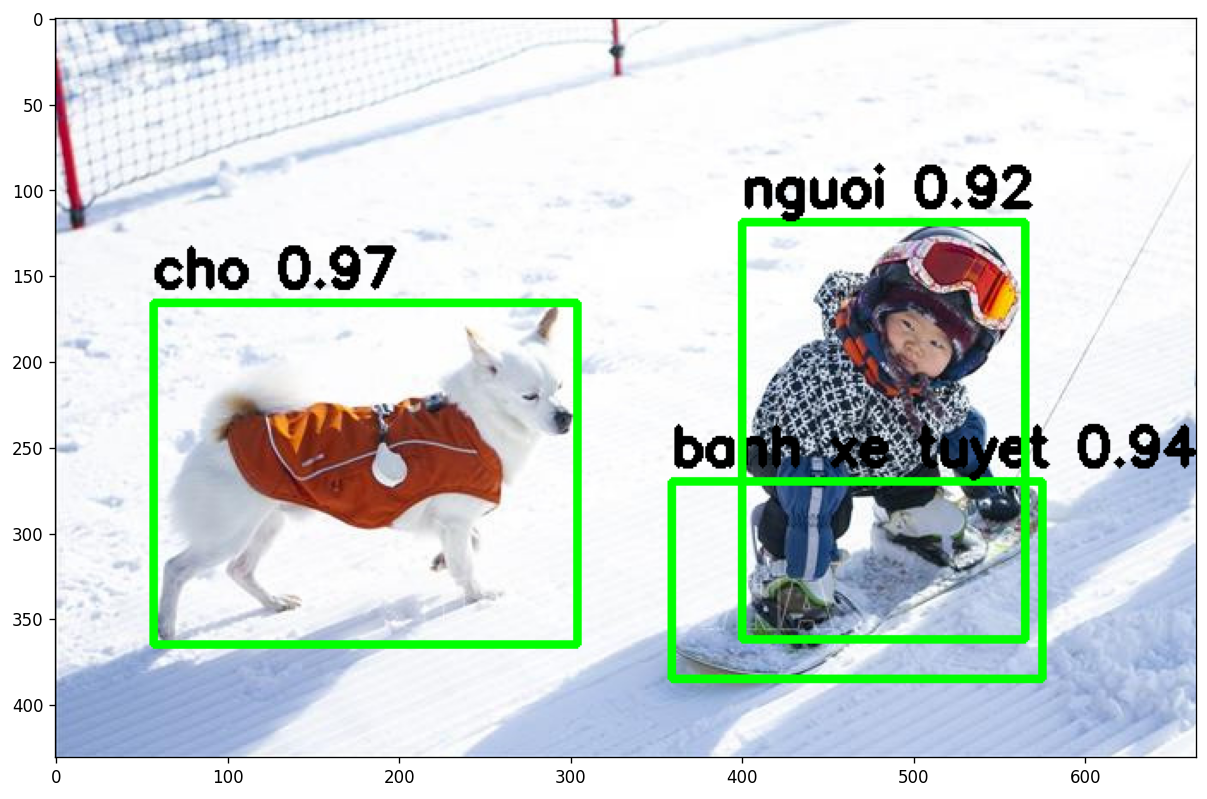

In [19]:
def show_bbox_and_label():
    results = model(image)

    for r in results:    # for number of OBJECTS detected in the image
        boxes = r.boxes  # give me the bounding boxes of those objects detected in the image
        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            w, h = x2-x1, y2-y1
            print(f"x1,y1 coordinate: {(x1,y1)}\nx2,y2 coordinate: {x2,y2}\nWidth: {w}\nHeight:{h}")

            # Find out the confidence
            conf = math.ceil(box.conf[0]*100) / 100
            print(f"Confidence of box: {conf}\n","-"*30)

            # Find out the class name
            cls = int(box.cls[0])

            # Draw the rectangle
            cv2.rectangle(image, (x1,y1), (x2,y2), (0, 255, 0), 3)

            # Now, let's put the text on rectangle
            FONT = cv2.FONT_HERSHEY_SIMPLEX
            COLOR = (0, 0, 0)
            THICKNESS = 3
            ORG = (max(0, x1), max(35, y1 - 10))

            cv2.putText(image, str(f"{classnames[cls]} {conf}"), ORG, FONT, 1, COLOR, THICKNESS)

    plt.figure(figsize=(15,8), dpi=120)
    plt.imshow(image)

show_bbox_and_label()

--------------------------------------------------------